# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key

from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL, from the documentation

main_url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{main_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_dictionary = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_latitude = city_weather_dictionary["coord"]["lat"]
        city_longitude = city_weather_dictionary["coord"]["lon"]
        city_max_temp = city_weather_dictionary["main"]["temp_max"]
        city_humidity = city_weather_dictionary["main"]["humidity"]
        city_clouds = city_weather_dictionary["clouds"]["all"]
        city_wind = city_weather_dictionary["wind"]["speed"]
        city_country = city_weather_dictionary["sys"]["country"]
        city_date = city_weather_dictionary["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitude, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | monticello
Processing Record 2 of Set 1 | colima
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | ejido benito juarez
City not found. Skipping...
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | inhambane
Processing Record 9 of Set 1 | namtsy
Processing Record 10 of Set 1 | ranong
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | kiratu
Processing Record 13 of Set 1 | mengyin
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | manokwari
Processing Record 22 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame

CityDataDF = pd.DataFrame(city_data)

# Show Record Count

CityDataDF.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [8]:
# Display sample data

CityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555


In [9]:
# Export the CityDataDF into a CSV

CityDataDF.to_csv("output_data/cities.csv", index_label = "City_ID")

In [4]:
# Read saved data

MainCityDataDF = pd.read_csv("output_data/cities.csv", index_col = "City_ID")

# Display sample data

MainCityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,monticello,45.3055,-93.7941,24.97,40,100,3.60,US,1694741675
1,colima,19.1667,-104.0000,25.78,95,54,1.00,MX,1694741676
2,grytviken,-54.2811,-36.5092,-4.51,97,75,1.47,GS,1694741676
3,saint-francois,46.4154,3.9054,12.69,100,0,0.00,FR,1694741676
4,lihue,21.9789,-159.3672,28.58,82,75,6.69,US,1694741555


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

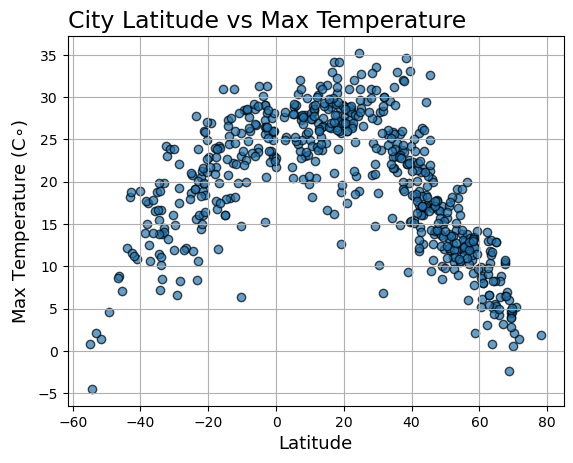

In [37]:
# Build scatter plot for latitude vs. max temperature

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Max Temp",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs Max Temperature",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Max Temperature (C$\circ$)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

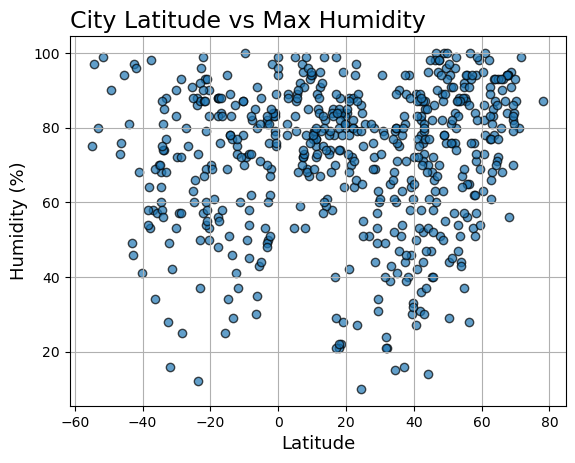

In [38]:
# Scatter plot for latitude vs. humidity

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Humidity",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs Max Humidity",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Humidity (%)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

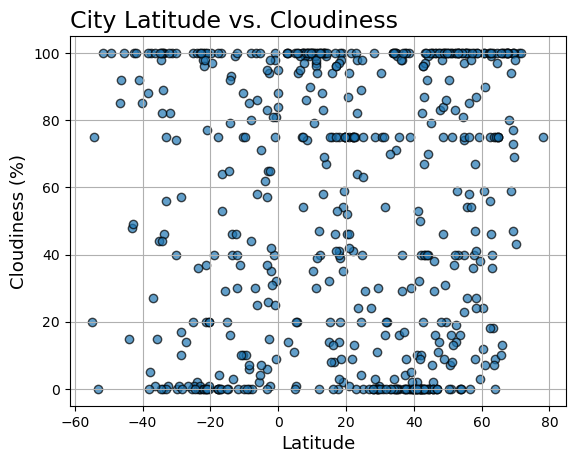

In [39]:
# Scatter plot for latitude vs. cloudiness

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Cloudiness",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs. Cloudiness",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Cloudiness (%)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

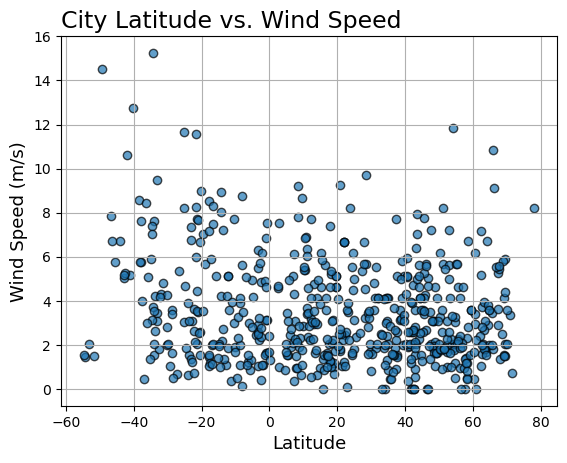

In [43]:
# Scatter plot for latitude vs. wind speed

plt.scatter(data = MainCityDataDF,
            x = "Lat",
            y = "Wind Speed",
            alpha = .70,
            edgecolors = "black"
            )
plt.title(label = "City Latitude vs. Wind Speed",
          fontsize = 17,
          loc = "left")
plt.xlabel(xlabel = "Latitude",
           fontsize = 13),
plt.ylabel(ylabel = "Wind Speed (m/s)",
           fontsize = 13)

plt.grid()

# Save the figure

plt.savefig("output_data/Fig4.png")

plt.show()

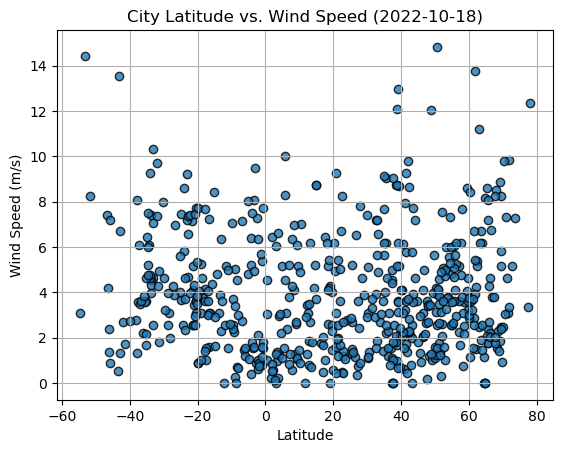

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


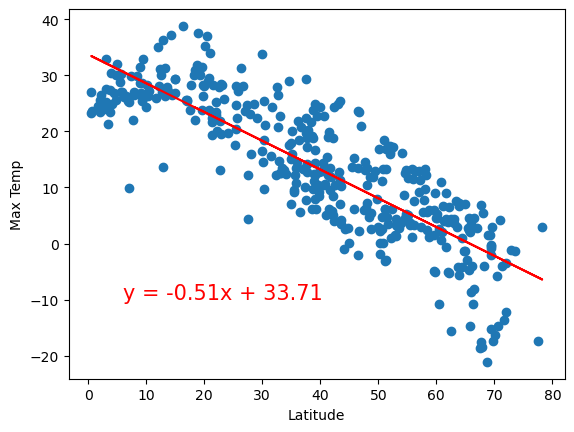

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


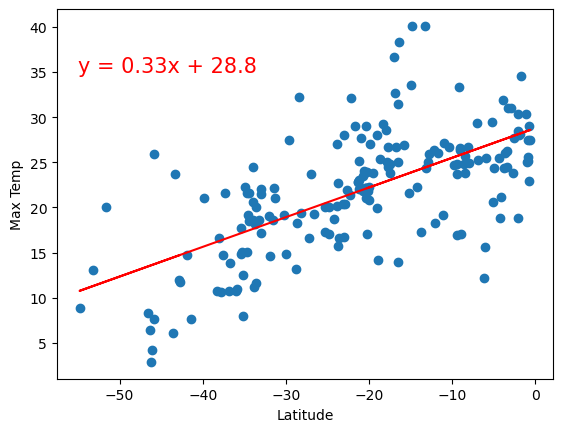

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


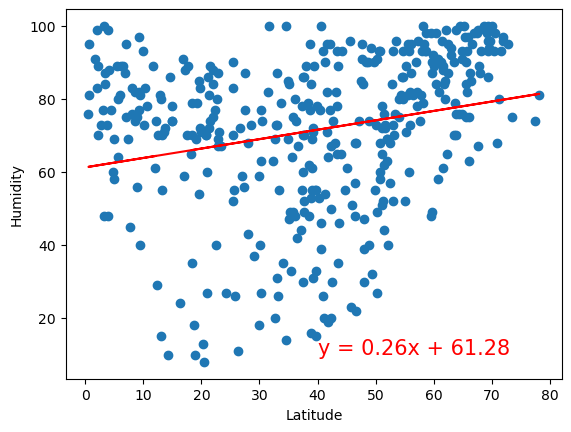

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


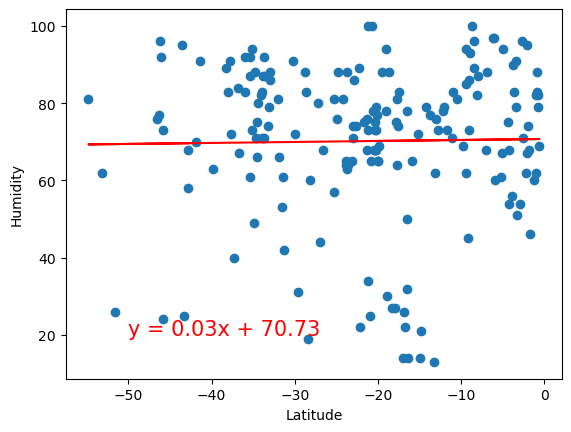

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


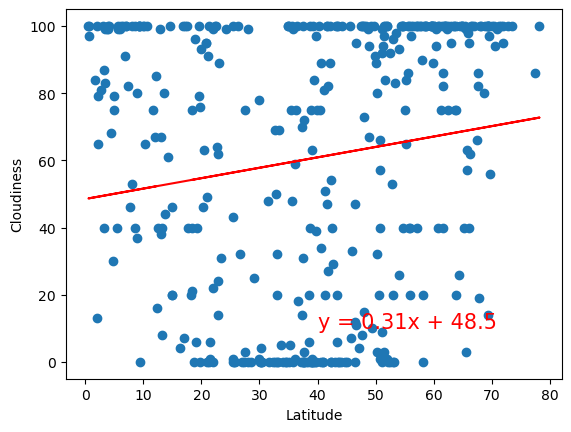

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


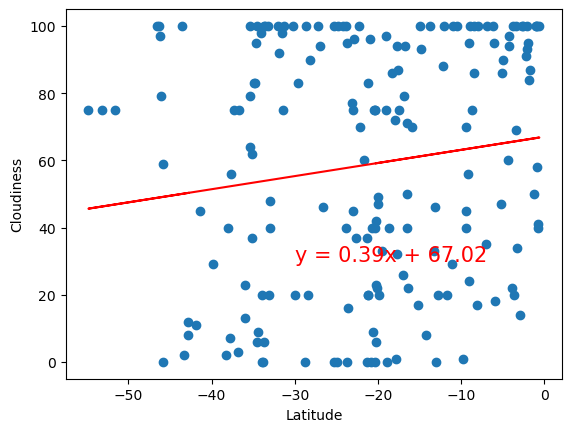

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


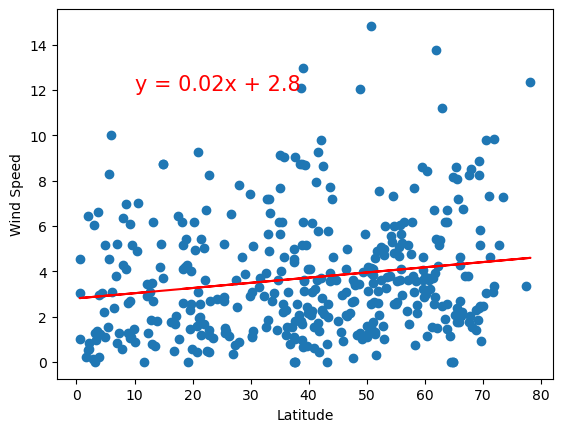

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


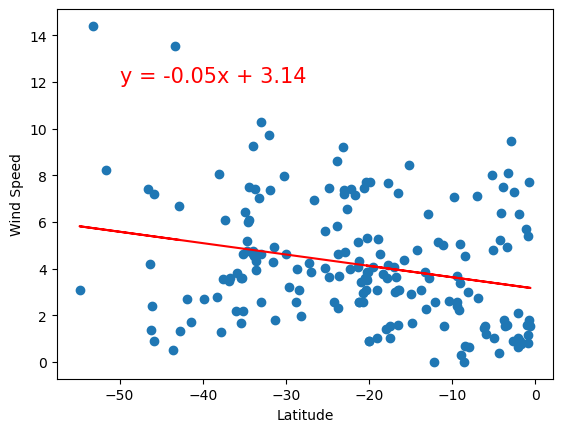

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE